HUMAN ACTION DECTECTION

STEP1: IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [4]:
from sklearn.metrics import classification_report, r2_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, mean_absolute_percentage_error

STEP2: DATA IMPORTING & ANALYSIS

In [5]:
df = pd.read_csv("mhealth_raw_data.csv")
df

alx      aly      alz       glx      gly      glz     arx  \
0        2.18490  -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499   
1        2.38760  -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275   
2        2.40860  -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055   
3        2.18140  -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279   
4        2.41730  -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008   
...          ...      ...      ...       ...      ...      ...     ...   
1048570  0.32374  -9.9511 -1.04640 -0.569570 -0.75422 -0.52456 -6.5886   
1048571  0.40570 -10.0510 -1.11310 -0.569570 -0.75422 -0.52456 -6.0806   
1048572  0.48707 -10.0110 -1.09980 -0.593690 -0.75047 -0.53045 -5.3752   
1048573  0.41283  -9.8038 -1.17360 -0.593690 -0.75047 -0.53045 -4.6322   
1048574  0.29146  -9.8527 -1.11470 -0.593690 -0.75047 -0.53045 -3.9156   

             ary       arz       grx      gry       grz  Activity   subject  
0        -4.5781  0.187760 -0.449020 -1.01030  0.034483         0  subject1  
1        -4.3198  0.023595 -0.449020 -1.01030  0.034483         0  subject1  
2        -4.2772  0.275720 -0.449020 -1.01030  0.034483         0  subject1  
3        -4.3163  0.367520 -0.456860 -1.00820  0.025862         0  subject1  
4        -4.1459  0.407290 -0.456860 -1.00820  0.025862         0  subject1  
...          ...       ...       ...      ...       ...       ...       ...  
1048570 -10.5290  2.129800 -0.182350 -0.92813 -0.553880         0  subject9  
1048571 -10.5710  1.877700 -0.182350 -0.92813 -0.553880         0  subject9  
1048572 -10.0910  1.870400 -0.078431 -0.96509 -0.560340         0  subject9  
1048573  -9.7003  1.973300 -0.078431 -0.96509 -0.560340         0  subject9  
1048574  -9.5098  2.024500 -0.078431 -0.96509 -0.560340         0  subject9  

[1048575 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1048575 non-null  float64
 1   aly       1048575 non-null  float64
 2   alz       1048575 non-null  float64
 3   glx       1048575 non-null  float64
 4   gly       1048575 non-null  float64
 5   glz       1048575 non-null  float64
 6   arx       1048575 non-null  float64
 7   ary       1048575 non-null  float64
 8   arz       1048575 non-null  float64
 9   grx       1048575 non-null  float64
 10  gry       1048575 non-null  float64
 11  grz       1048575 non-null  float64
 12  Activity  1048575 non-null  int64  
 13  subject   1048575 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 112.0+ MB


In [7]:
df.describe().T

count      mean       std      min        25%       50%  \
alx       1048575.0  1.481221  3.690661 -22.1460   0.169125  1.342900   
aly       1048575.0 -9.574932  4.071565 -19.6190 -10.084000 -9.647600   
alz       1048575.0 -0.879134  5.303325 -19.3730  -2.599400  0.019091   
glx       1048575.0 -0.010073  0.494208  -2.1466  -0.447120 -0.029685   
gly       1048575.0 -0.613595  0.356876  -7.7899  -0.812380 -0.703560   
glz       1048575.0 -0.137629  0.545297  -2.5678  -0.567780 -0.149310   
arx       1048575.0 -3.551709  4.711360 -22.3610  -5.890450 -2.870500   
ary       1048575.0 -5.707373  5.726784 -18.9720  -9.364650 -7.380000   
arz       1048575.0  2.654840  3.879341 -18.2390   0.417540  2.218300   
grx       1048575.0 -0.275081  0.534901  -8.3392  -0.705880 -0.356860   
gry       1048575.0 -0.455630  0.564748  -3.5708  -0.893220 -0.626280   
grz       1048575.0  0.288222  0.555664  -2.6897  -0.196120  0.325430   
Activity  1048575.0  1.732673  3.251485   0.0000   0.000000  0.000000   

               75%      max  
alx       2.568100  20.0540  
aly      -9.014300  21.1610  
alz       1.372500  25.0150  
glx       0.441560  60.4840  
gly      -0.542210   2.0113  
glz       0.341850   2.7701  
arx      -1.030400  19.8640  
ary      -2.450350  22.1910  
arz       5.257650  25.7410  
grx       0.096078   3.3196  
gry      -0.080082   1.5565  
grz       0.788790   2.7500  
Activity  2.000000  12.0000

In [8]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: xlabel='Activity'>

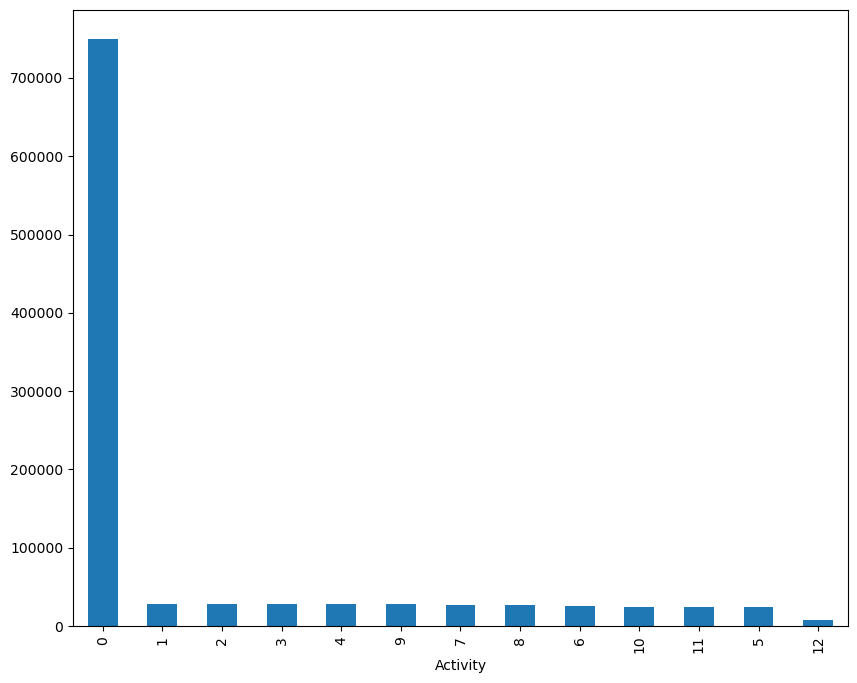

In [10]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [11]:
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]

In [12]:
data_activity_0 = data_activity_0.sample(n=40000)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: xlabel='Activity'>

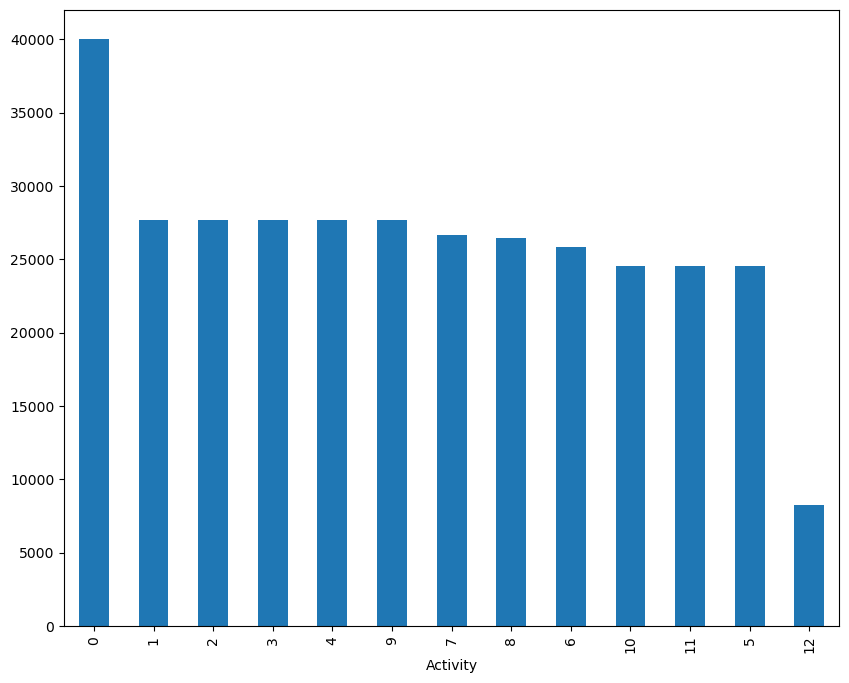

In [13]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [14]:
len(df)

339214

STEP3: EDA

In [15]:
activity_label = {
    0: "None" ,
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
} 

============================Standing still (1 min) - a====================


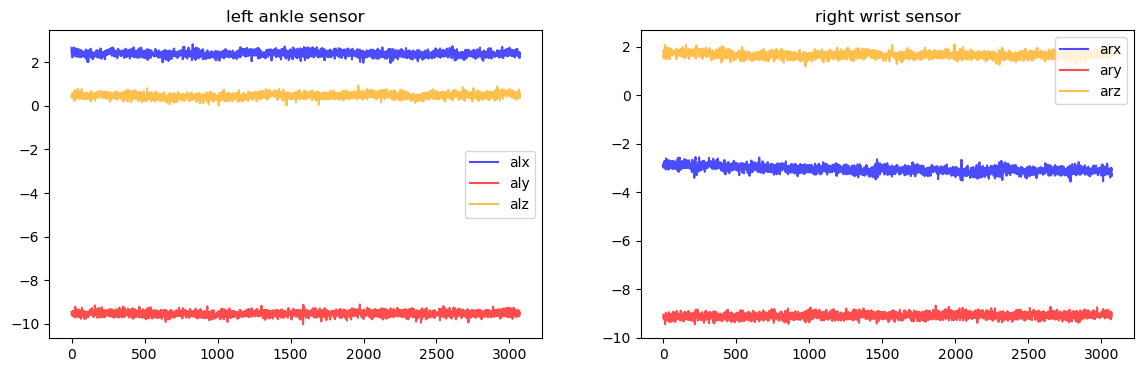

============================Standing still (1 min) - g====================


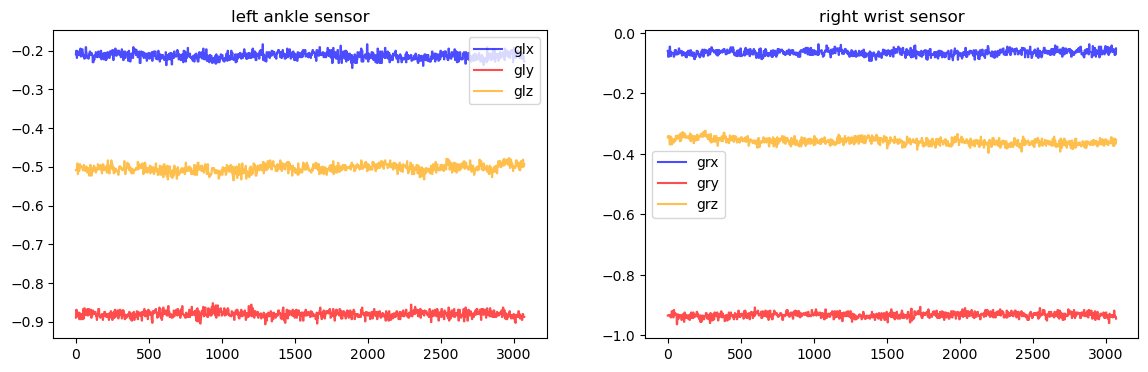

============================Sitting and relaxing (1 min) - a====================


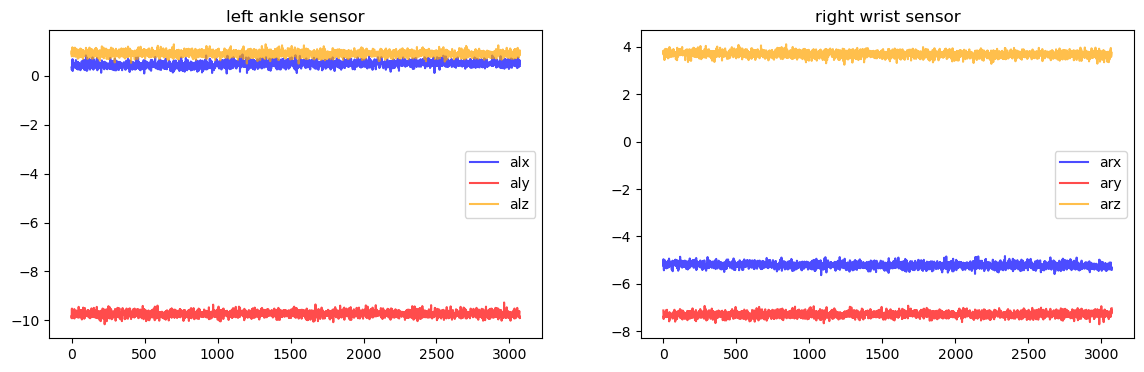

============================Sitting and relaxing (1 min) - g====================


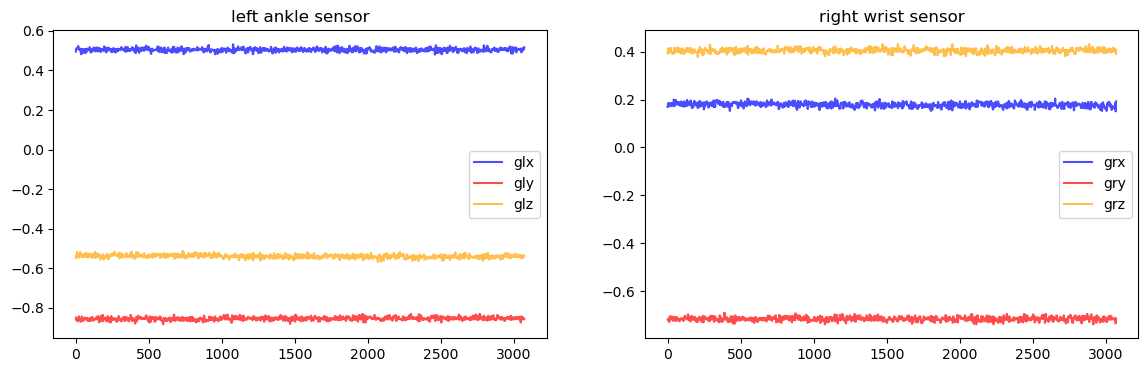

============================Lying down (1 min) - a====================


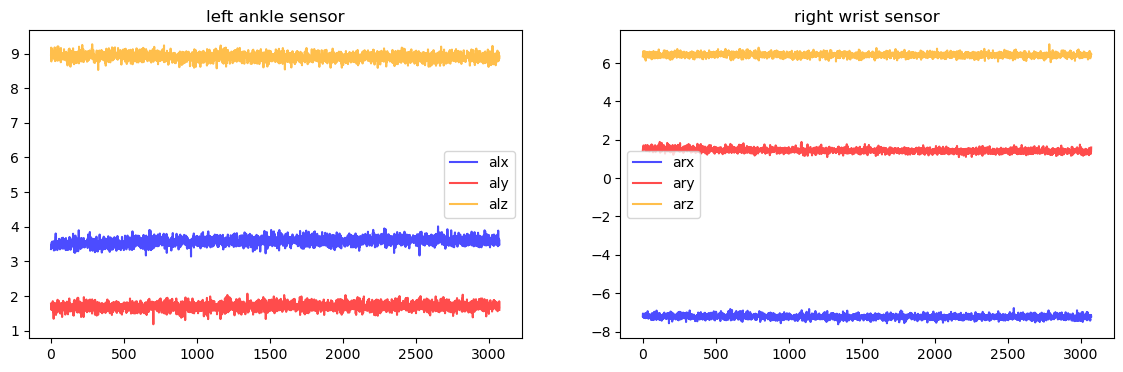

============================Lying down (1 min) - g====================


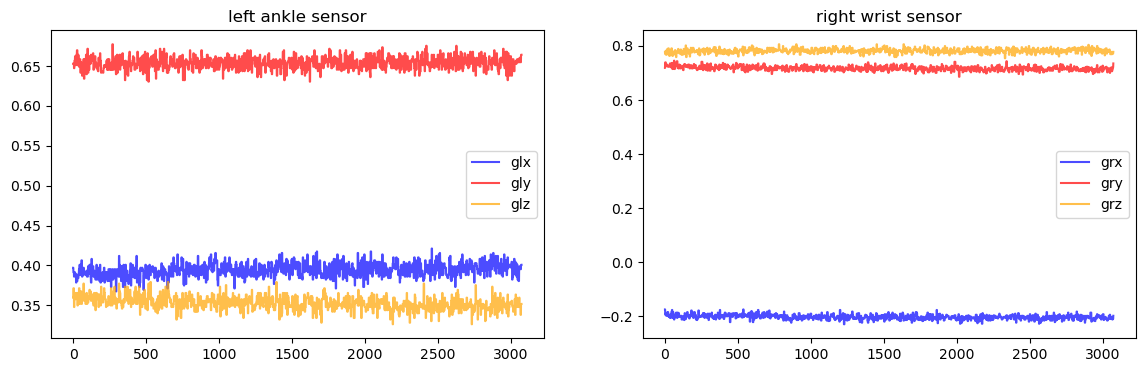

============================Walking (1 min) - a====================


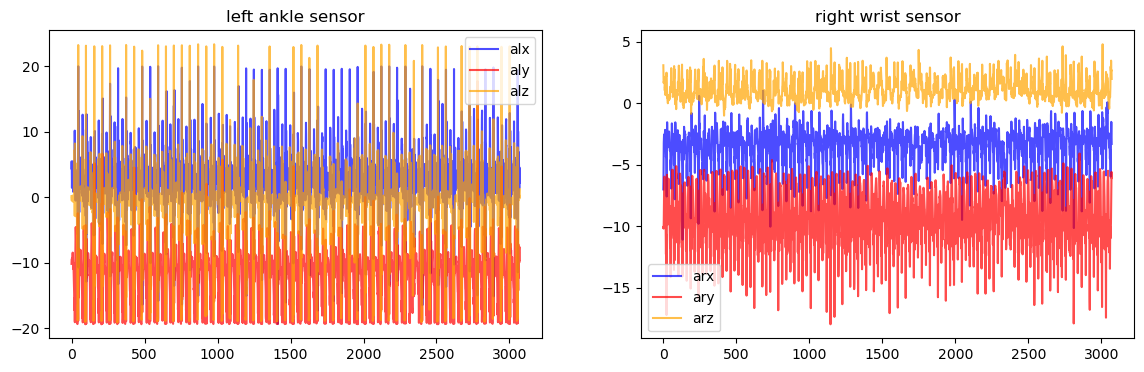

============================Walking (1 min) - g====================


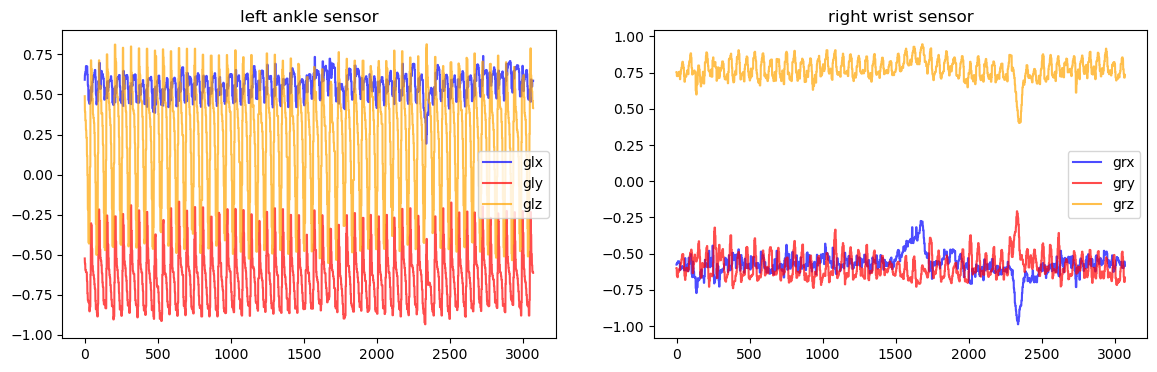

============================Climbing stairs (1 min) - a====================


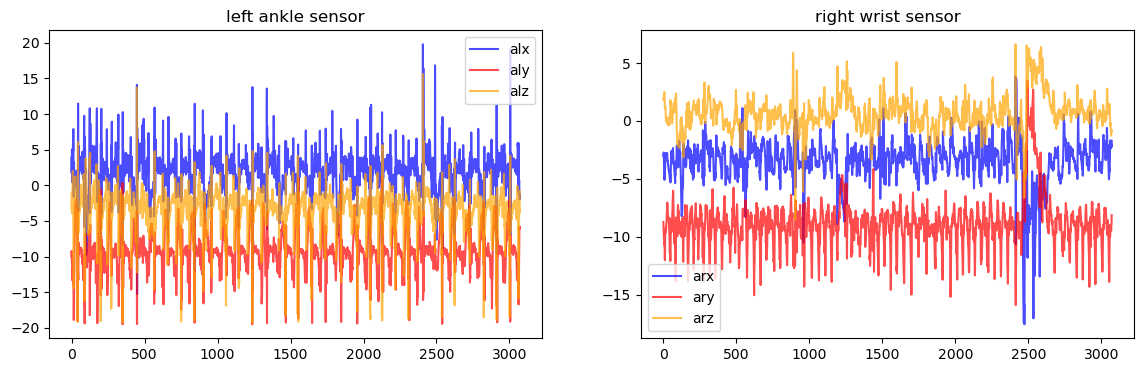

============================Climbing stairs (1 min) - g====================


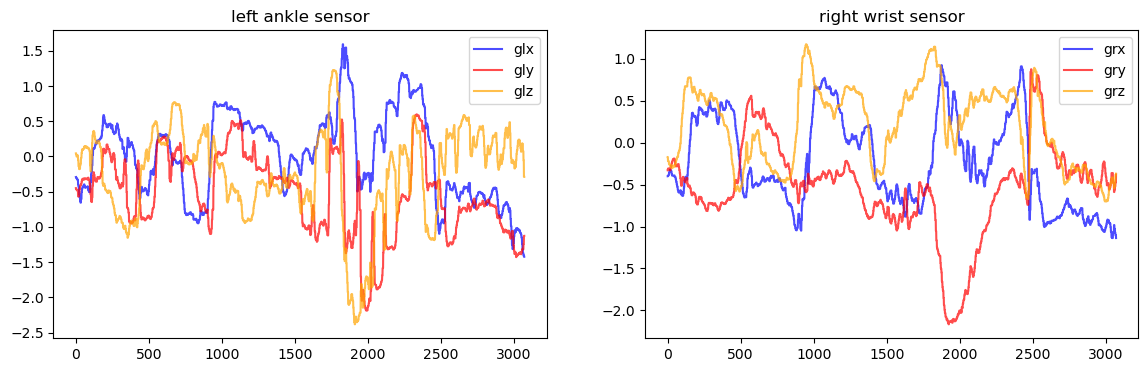

============================Waist bends forward (20x) - a====================


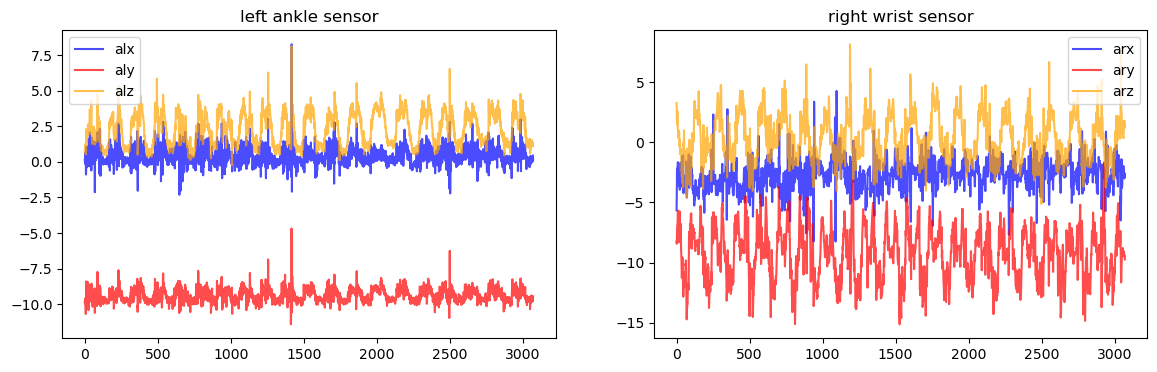

============================Waist bends forward (20x) - g====================


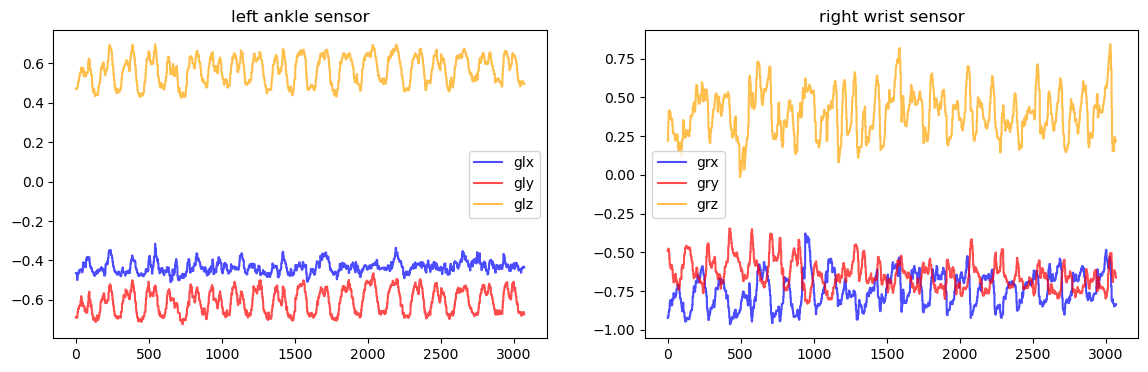

============================Frontal elevation of arms (20x) - a====================


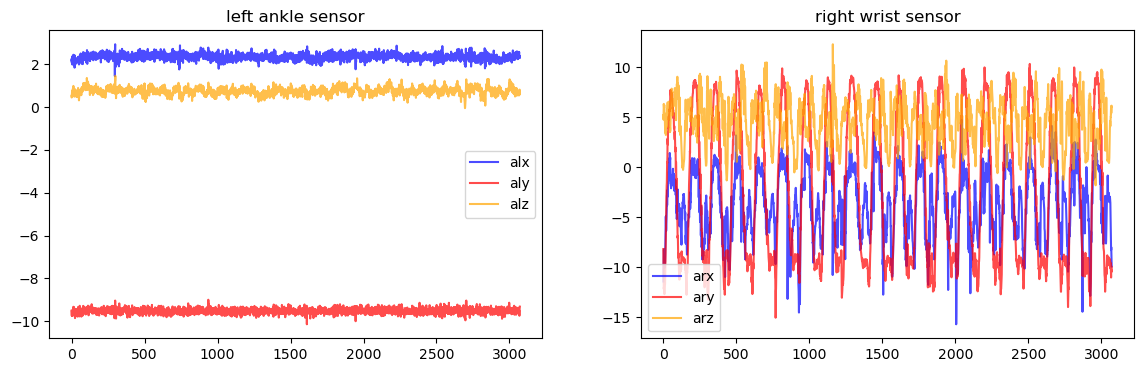

============================Frontal elevation of arms (20x) - g====================


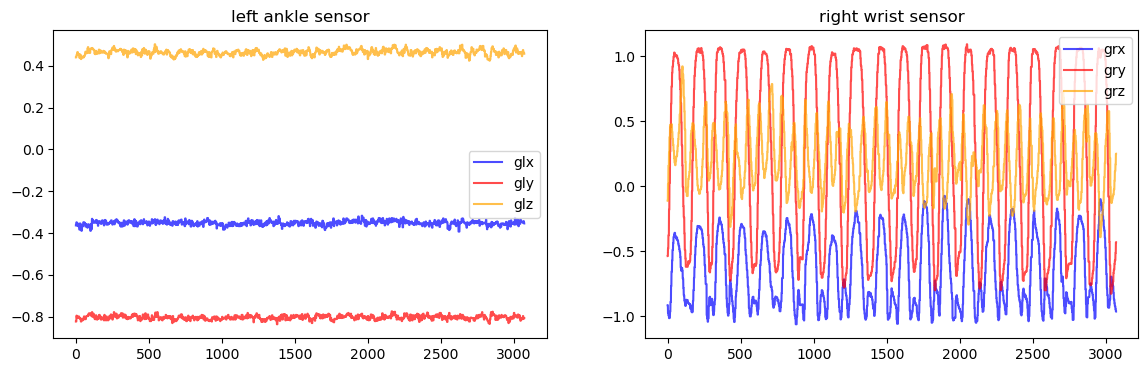

============================Knees bending (crouching) (20x) - a====================


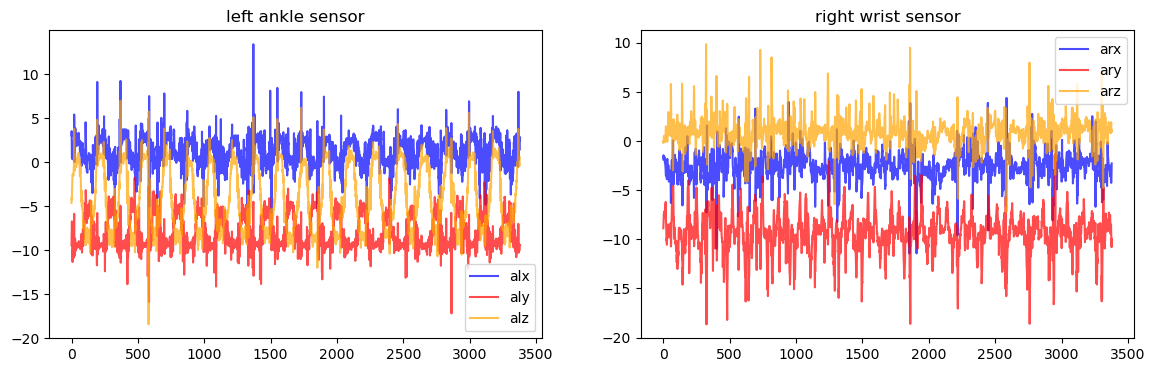

============================Knees bending (crouching) (20x) - g====================


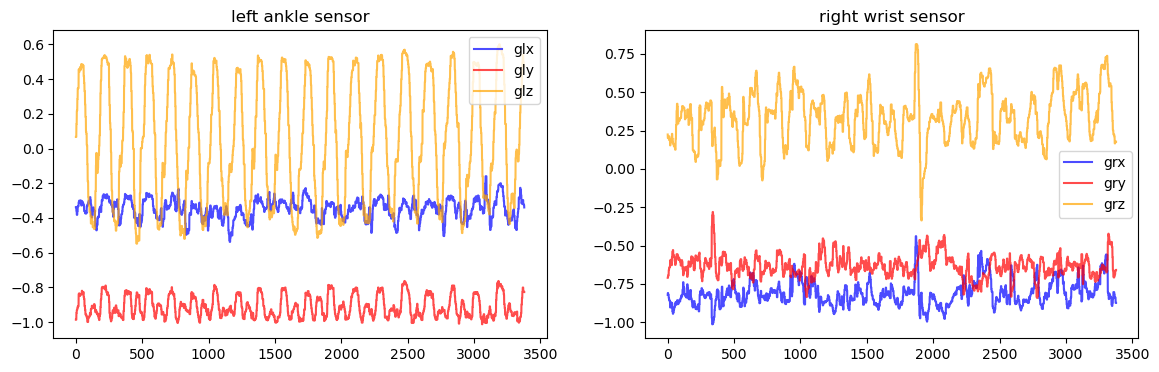

============================Cycling (1 min) - a====================


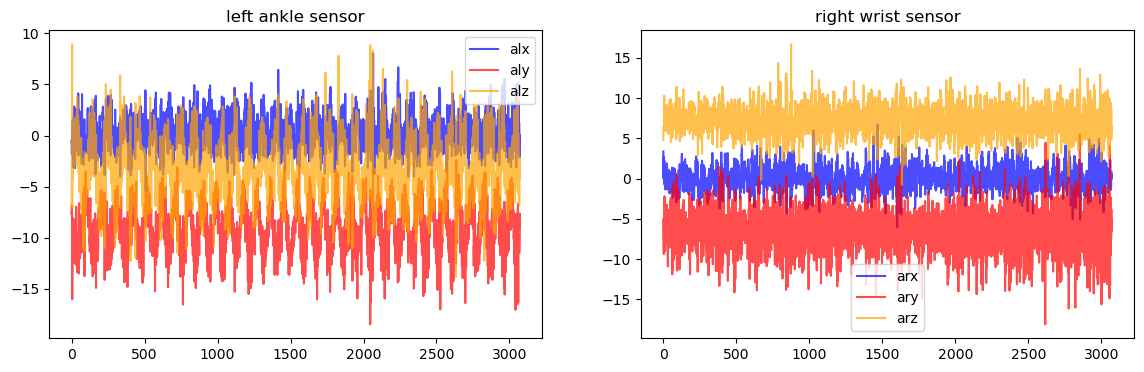

============================Cycling (1 min) - g====================


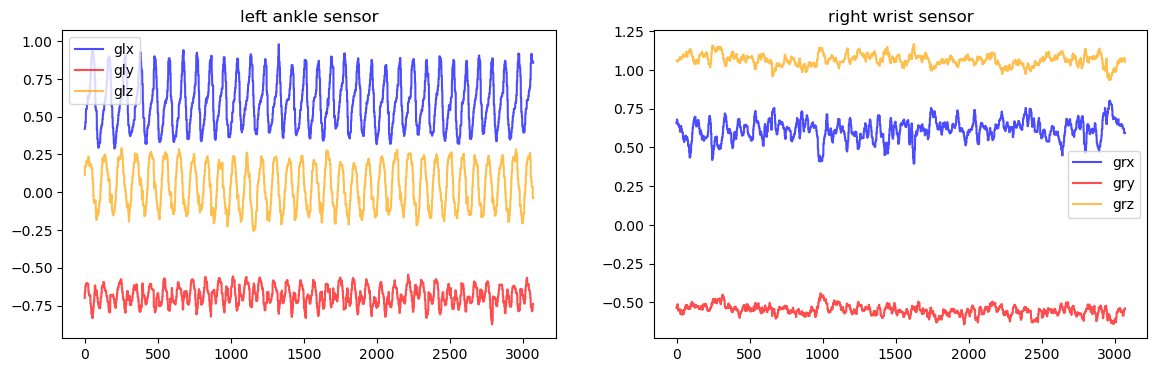

============================Jogging (1 min) - a====================


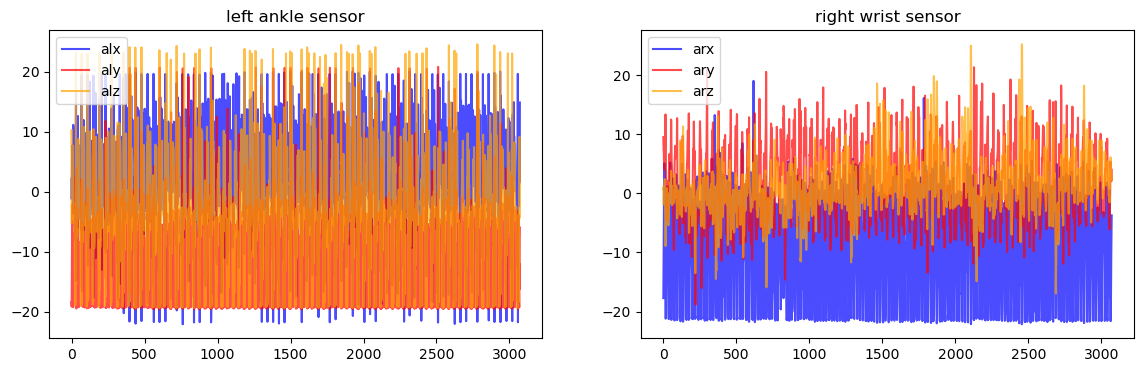

============================Jogging (1 min) - g====================


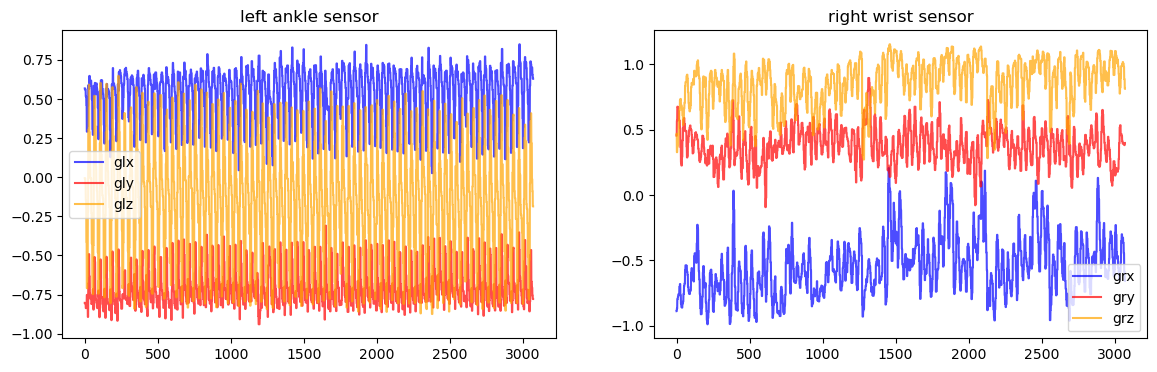

============================Running (1 min) - a====================


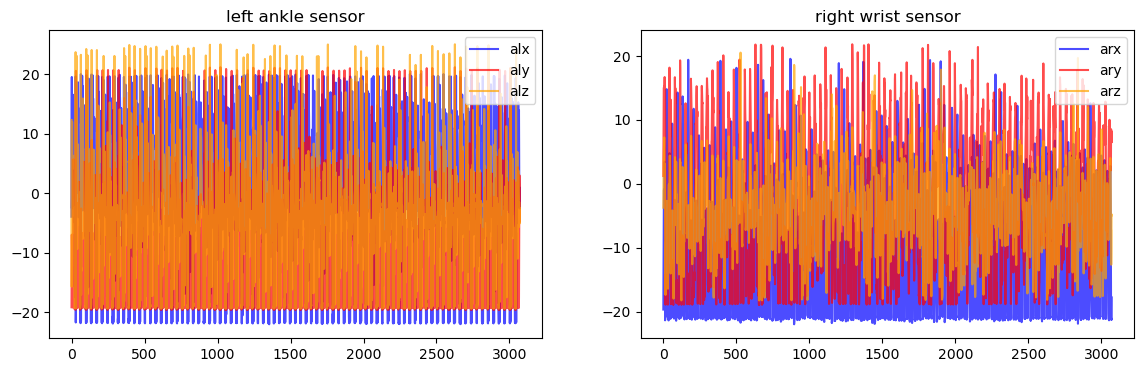

============================Running (1 min) - g====================


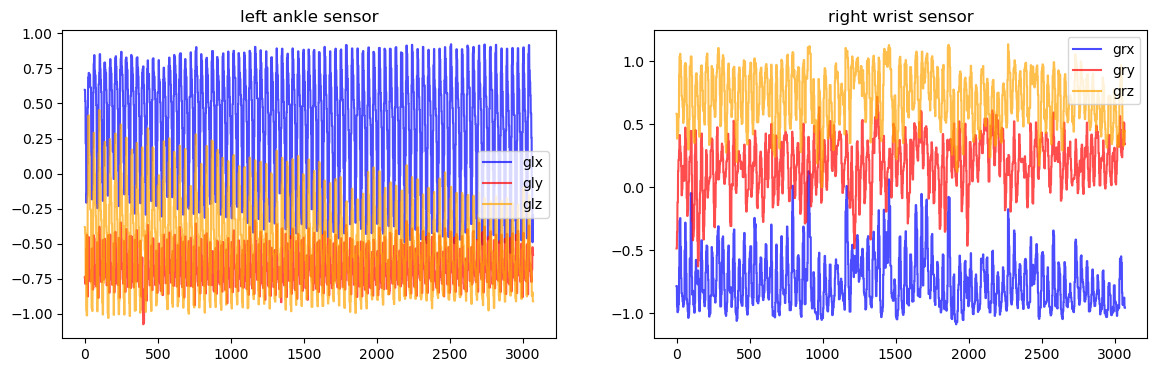

============================Jump front & back (20x) - a====================


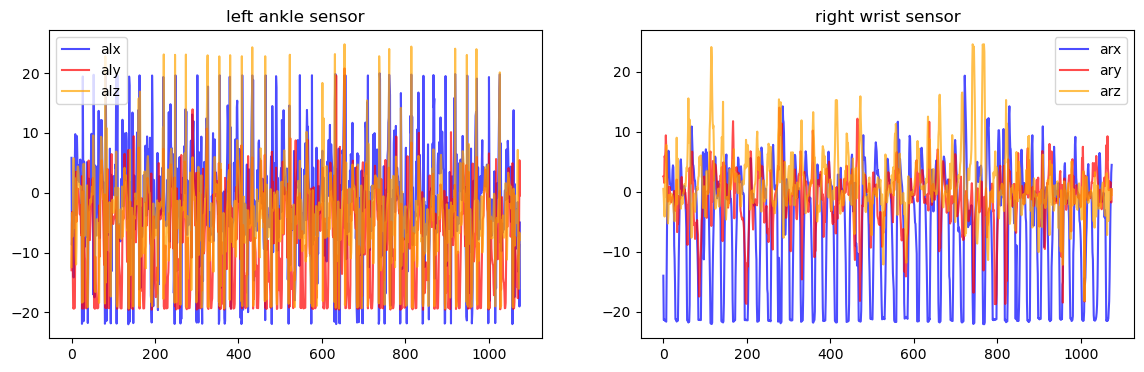

============================Jump front & back (20x) - g====================


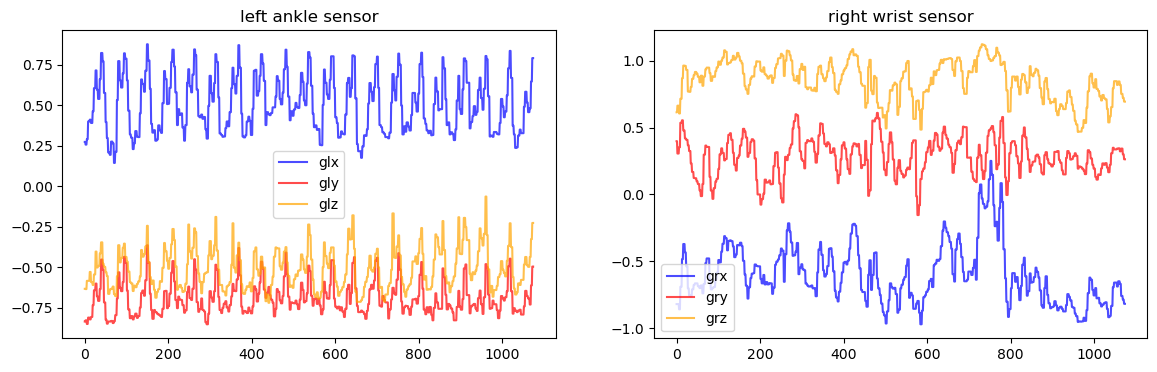

In [16]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a','g']

for i in range(1,13):
    for r in readings:
        print(f"============================{activity_label[i]} - {r}====================")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color = 'blue', alpha = 0.7, label = r + "lx") 
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color = 'red', alpha = 0.7, label = r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color = 'orange' , alpha = 0.7, label = r + "lz") 
        plt.title("left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx") 
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"], color = 'red', alpha = 0.7, label = r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"], color = 'orange' , alpha = 0.7, label = r + "rz") 
        plt.title("right wrist sensor")
        plt.legend()
        plt.show()

============================Standing still (1 min) - a====================


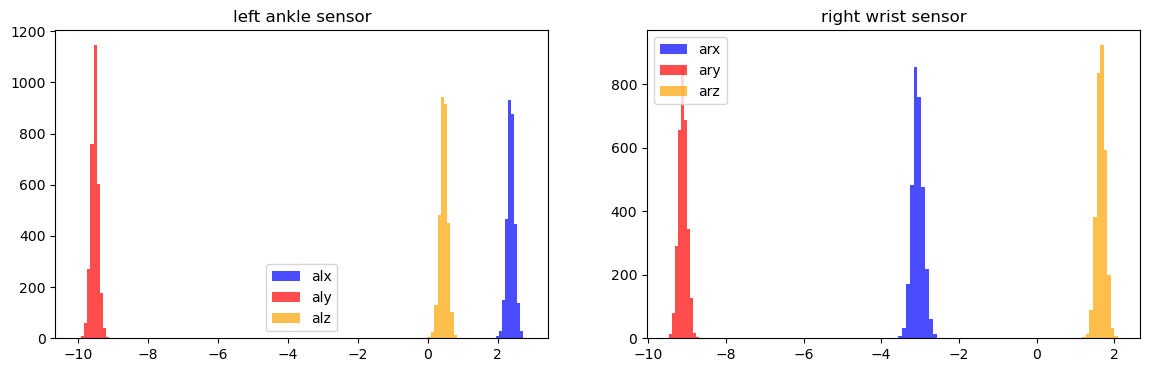

============================Standing still (1 min) - g====================


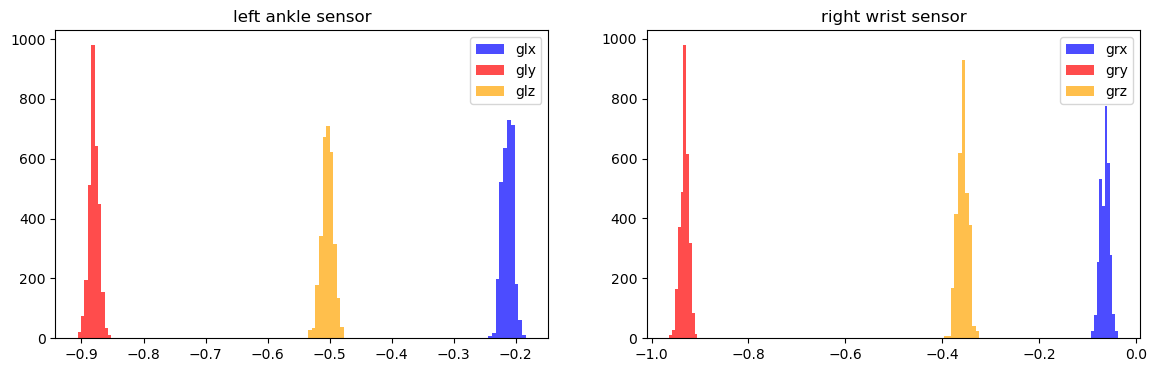

============================Sitting and relaxing (1 min) - a====================


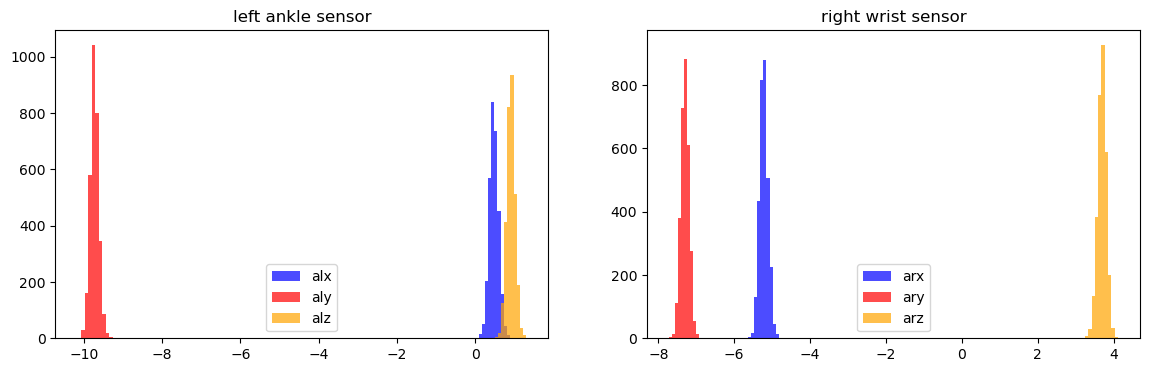

============================Sitting and relaxing (1 min) - g====================


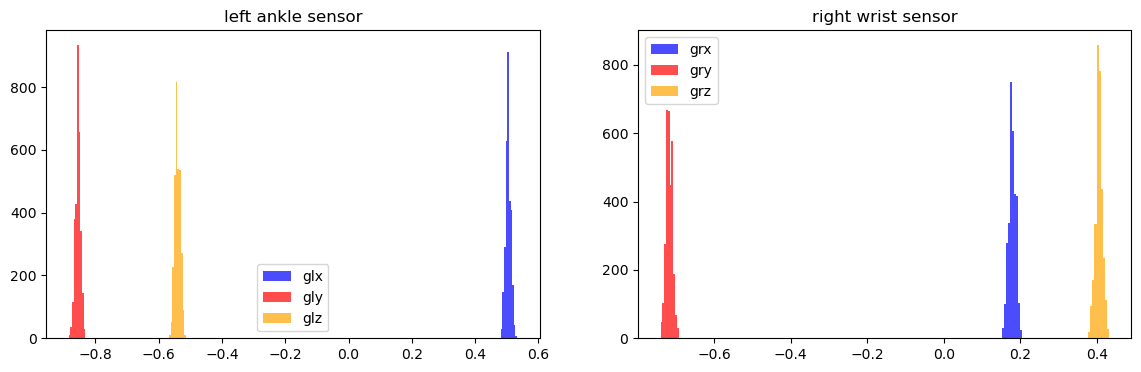

============================Lying down (1 min) - a====================


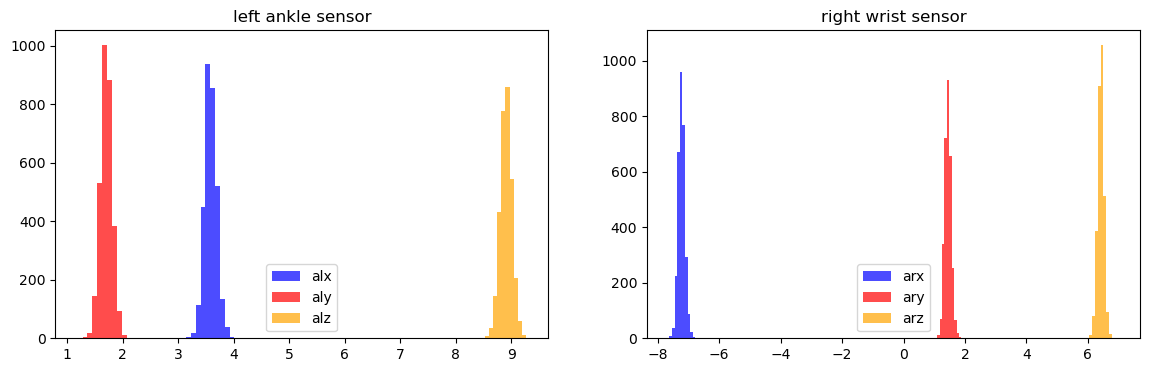

============================Lying down (1 min) - g====================


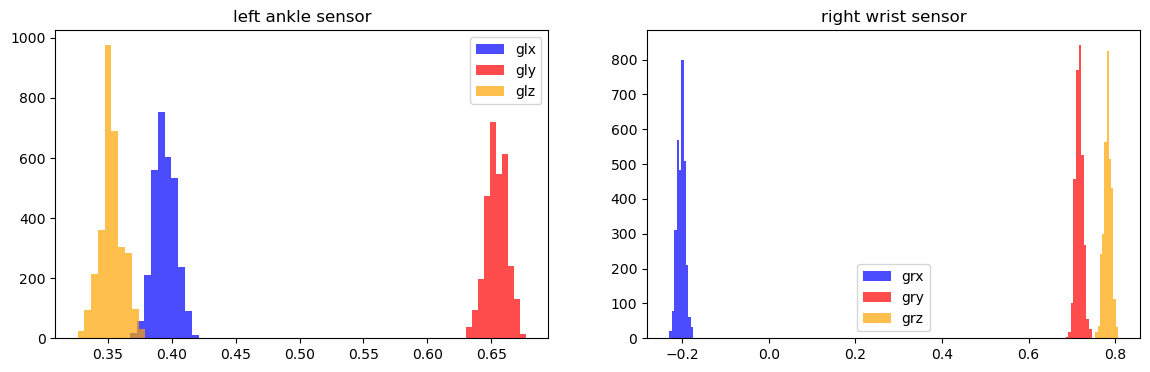

============================Walking (1 min) - a====================


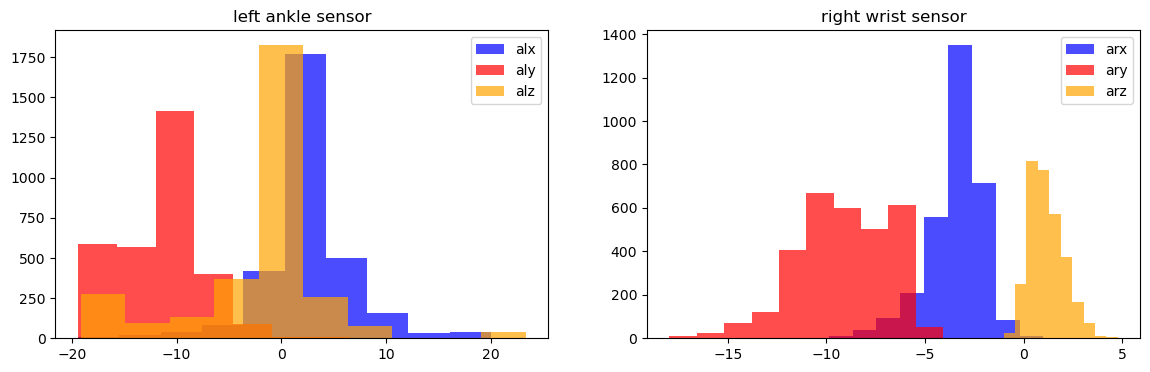

============================Walking (1 min) - g====================


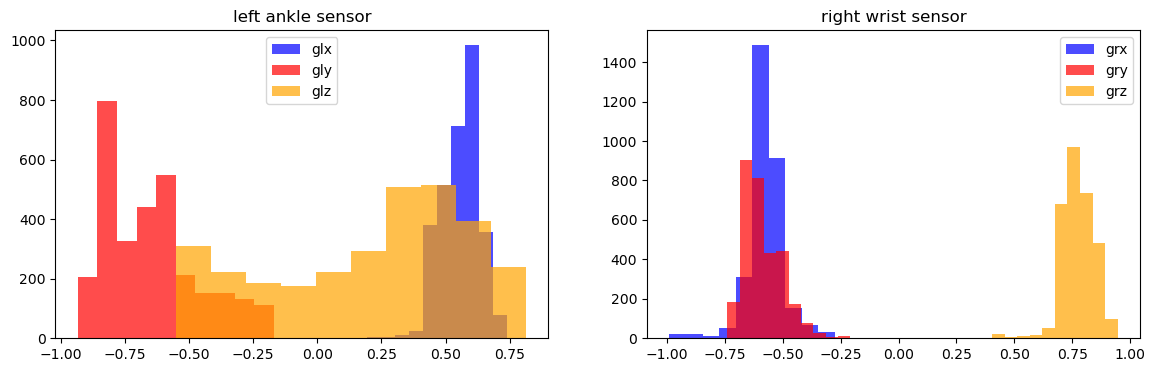

============================Climbing stairs (1 min) - a====================


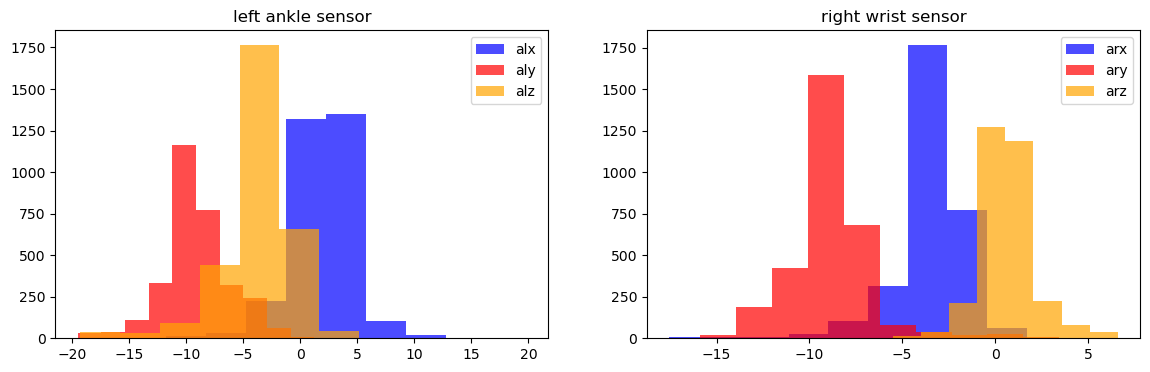

============================Climbing stairs (1 min) - g====================


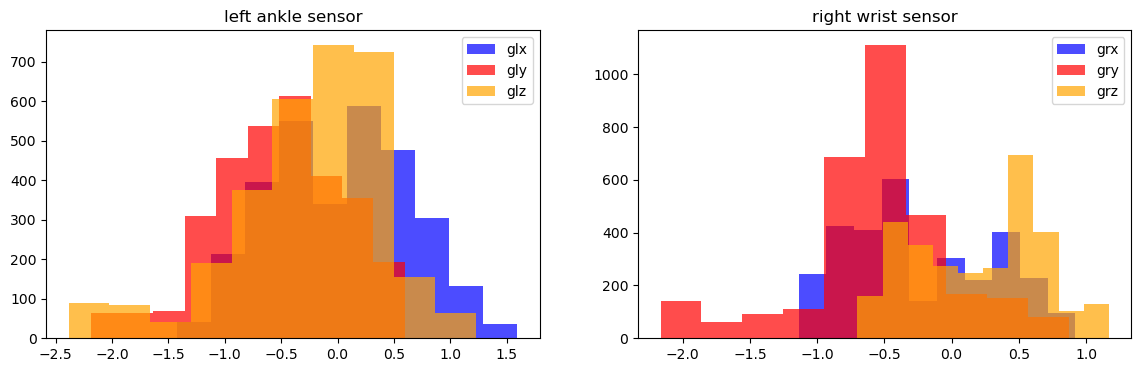

============================Waist bends forward (20x) - a====================


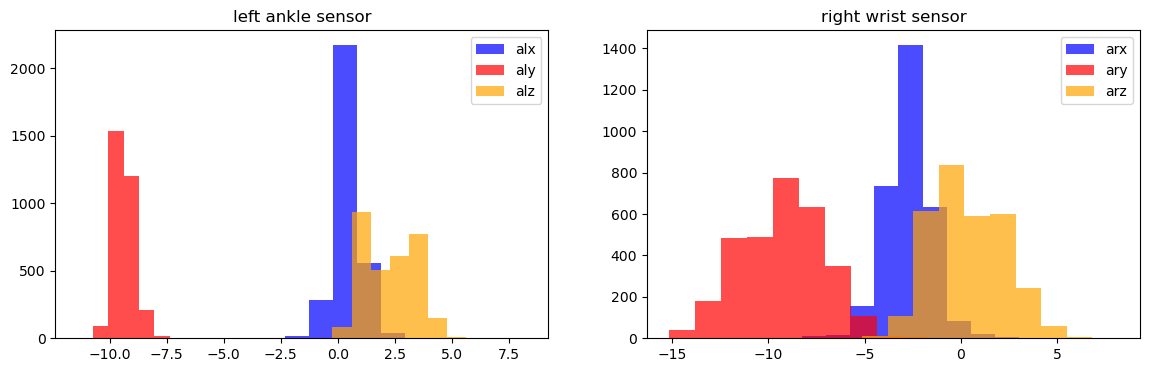

============================Waist bends forward (20x) - g====================


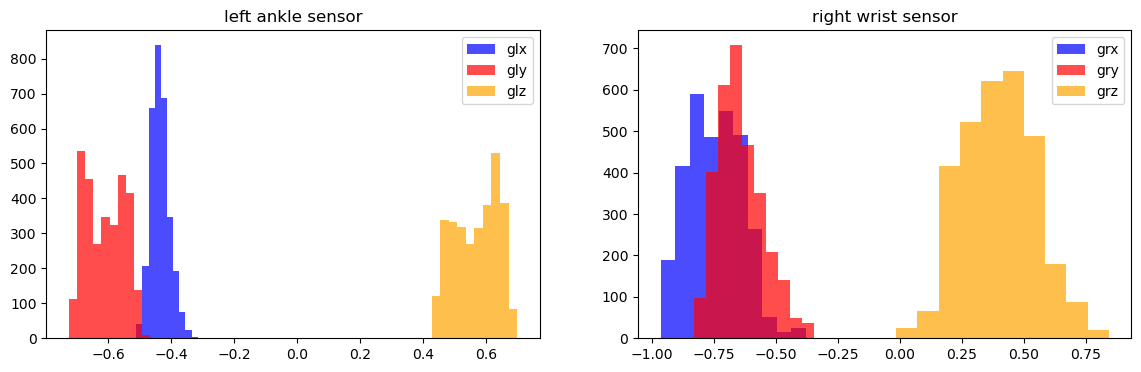

============================Frontal elevation of arms (20x) - a====================


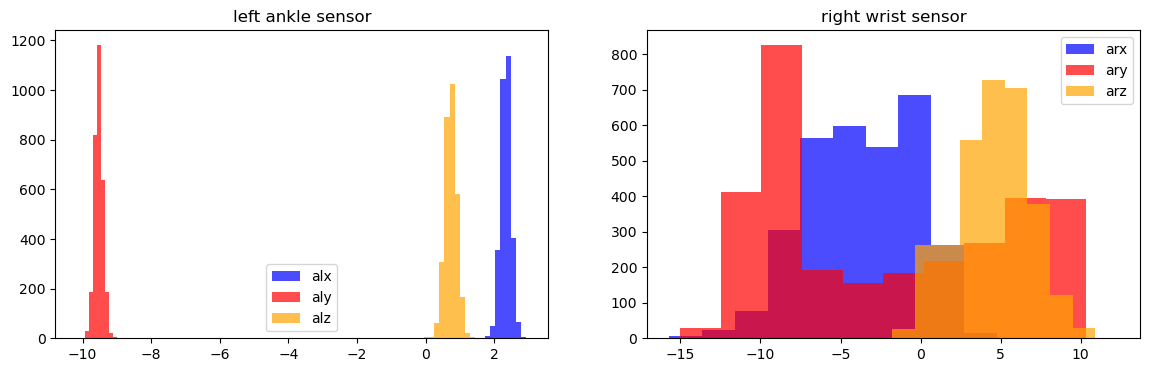

============================Frontal elevation of arms (20x) - g====================


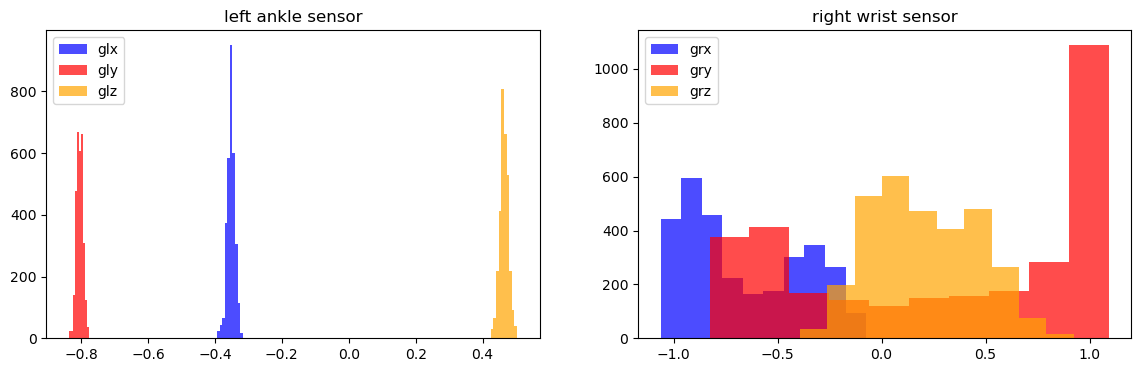

============================Knees bending (crouching) (20x) - a====================


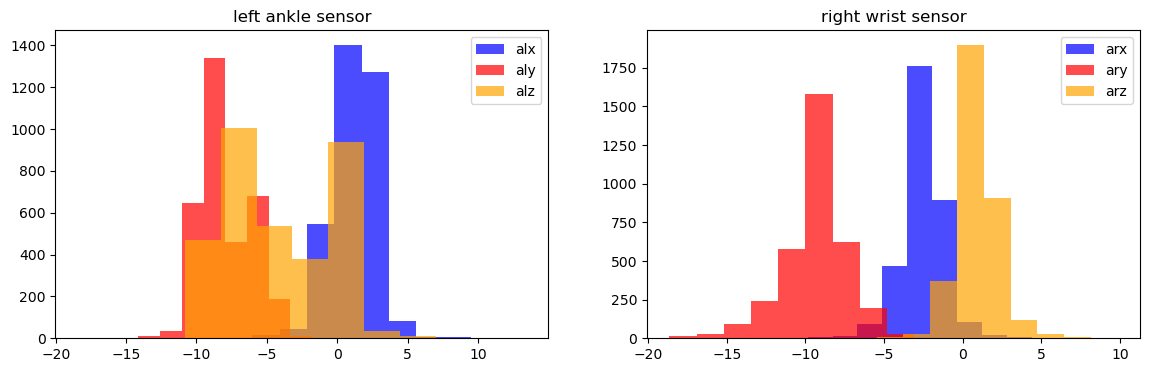

============================Knees bending (crouching) (20x) - g====================


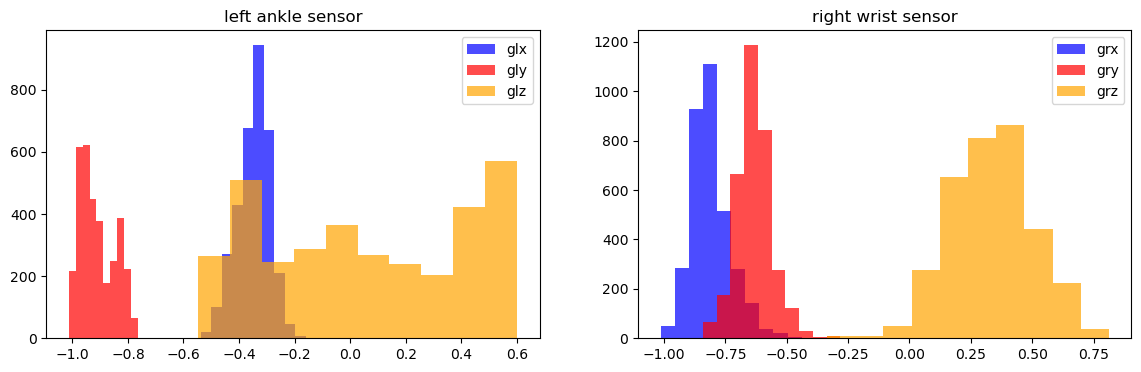

============================Cycling (1 min) - a====================


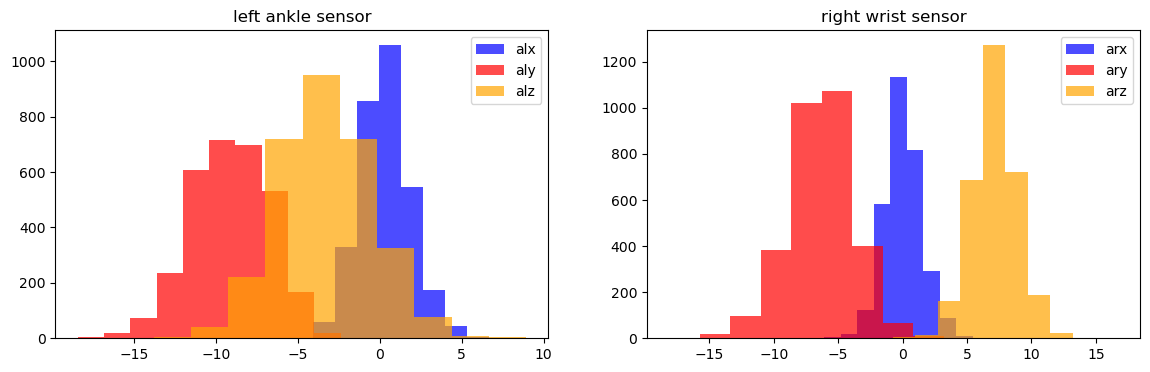

============================Cycling (1 min) - g====================


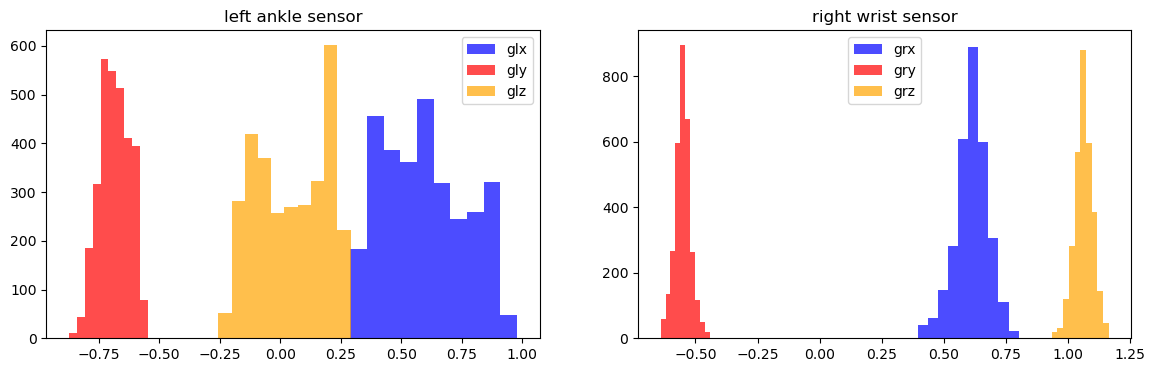

============================Jogging (1 min) - a====================


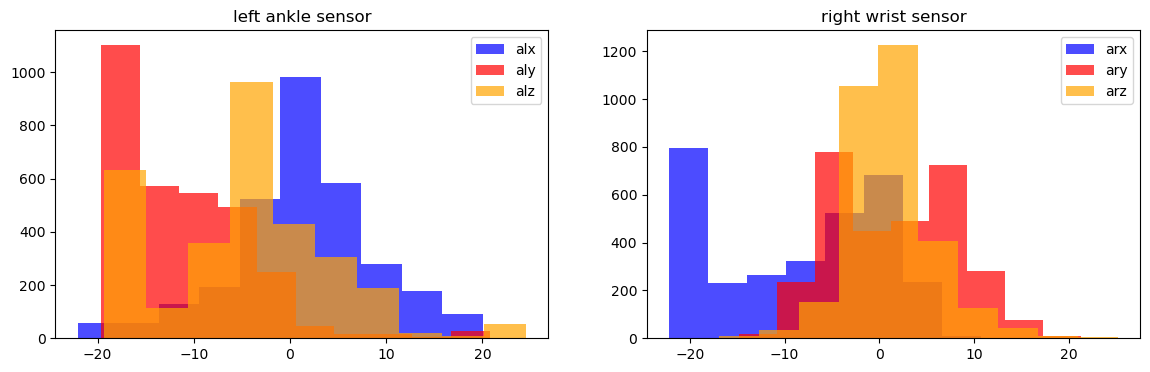

============================Jogging (1 min) - g====================


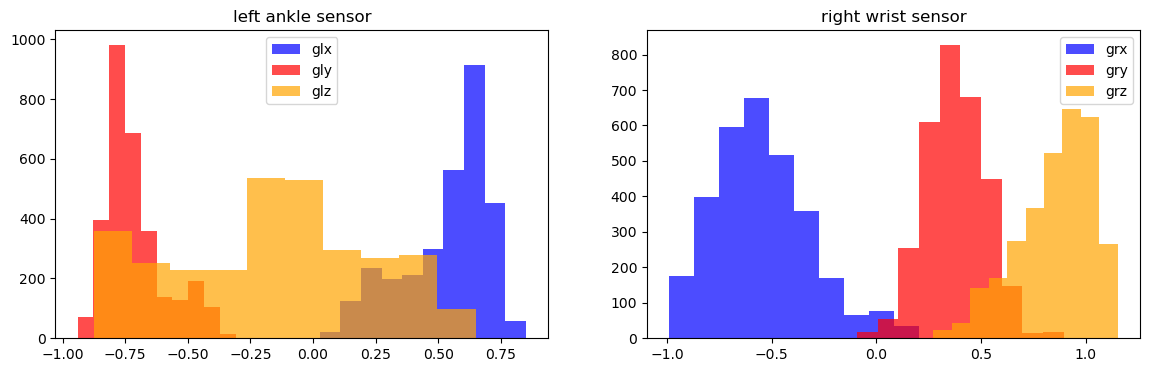

============================Running (1 min) - a====================


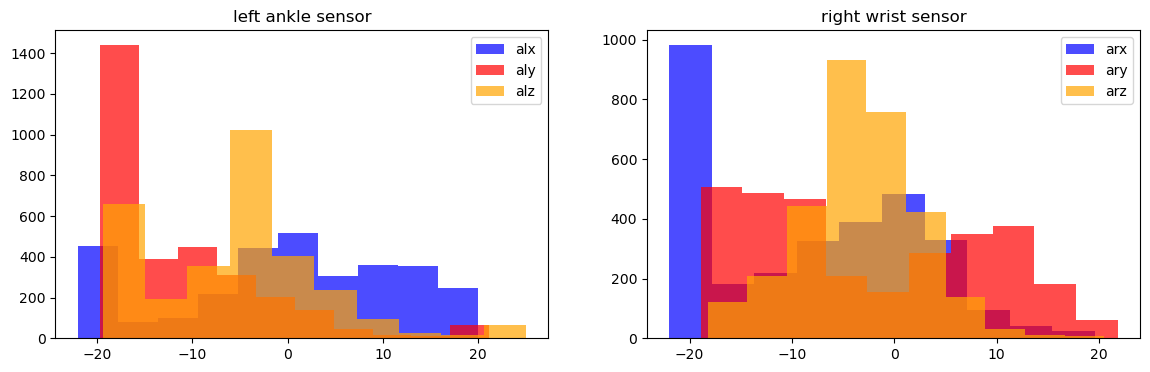

============================Running (1 min) - g====================


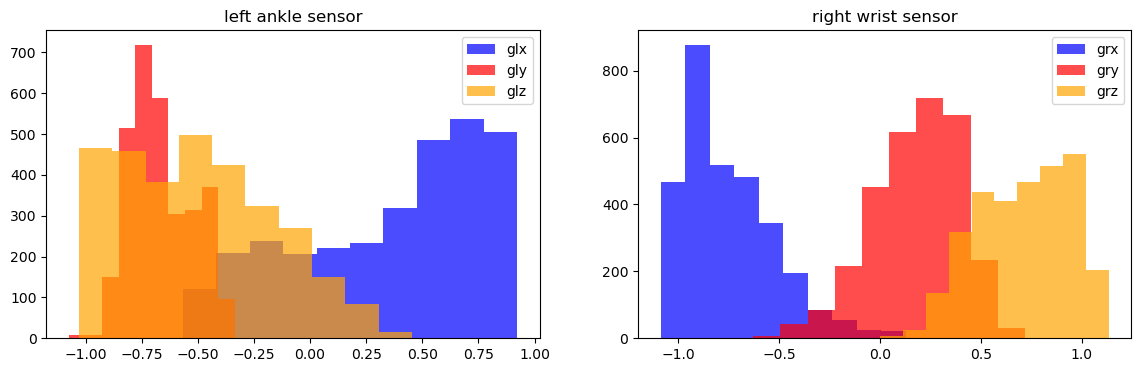

============================Jump front & back (20x) - a====================


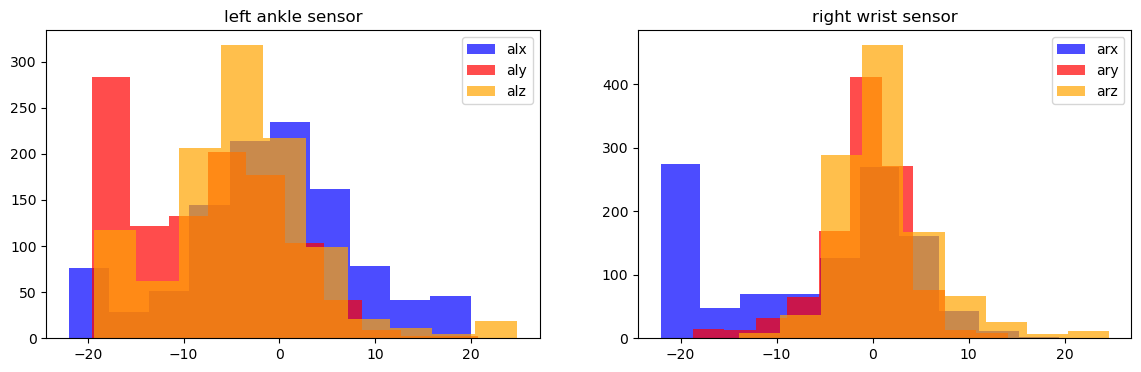

============================Jump front & back (20x) - g====================


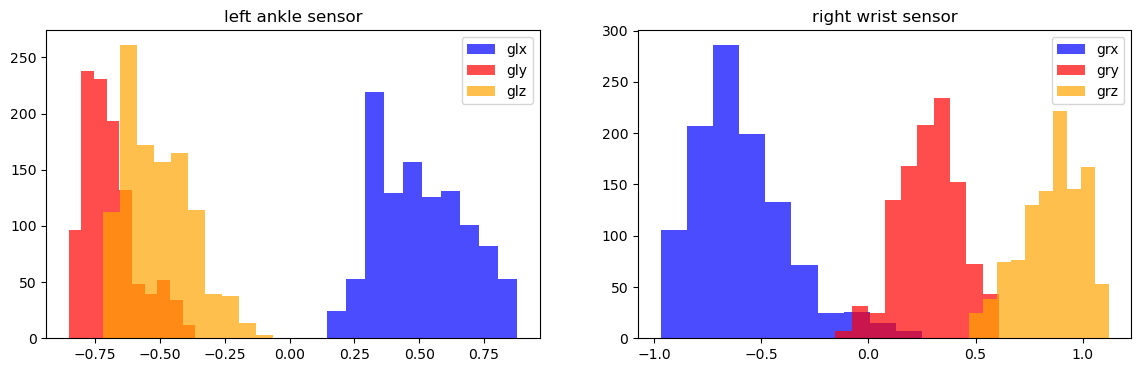

In [17]:
for i in range(1,13):
    for r in readings:
        print(f"============================{activity_label[i]} - {r}====================")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color = 'blue', alpha = 0.7, label = r + "lx") 
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color = 'red', alpha = 0.7, label = r + "ly")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color = 'orange' , alpha = 0.7, label = r + "lz") 
        plt.title("left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx") 
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"], color = 'red', alpha = 0.7, label = r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"], color = 'orange' , alpha = 0.7, label = r + "rz") 
        plt.title("right wrist sensor")
        plt.legend()
        plt.show()

In [18]:
  df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None' ,
                                                                          'Standing still (1 min)',
                                                                           'Sitting and relaxing (1 min)',
                                                                            'Lying down (1 min)',
                                                                            'Walking (1 min)',
                                                                            'Climbing stairs (1 min)',
                                                                            'Waist bends forward (20x)',
                                                                            'Frontal elevation of arms (20x)',
                                                                            'Knees bending (crouching) (20x)',
                                                                            'Cycling (1 min)',
                                                                            'Jogging (1 min)',
                                                                            'Running (1 min)',
                                                                            'Jump front & back (20x)'])

In [19]:
df["Activity"]

325195                None
781070                None
129382                None
250201                None
891283                None
                ...       
1046268    Cycling (1 min)
1046269    Cycling (1 min)
1046270    Cycling (1 min)
1046271    Cycling (1 min)
1046272    Cycling (1 min)
Name: Activity, Length: 339214, dtype: object

In [20]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             27648
Sitting and relaxing (1 min)       27648
Lying down (1 min)                 27648
Walking (1 min)                    27648
Cycling (1 min)                    27648
Frontal elevation of arms (20x)    26676
Knees bending (crouching) (20x)    26470
Waist bends forward (20x)          25857
Jogging (1 min)                    24576
Running (1 min)                    24576
Climbing stairs (1 min)            24576
Jump front & back (20x)             8243
Name: count, dtype: int64

<Axes: ylabel='count'>

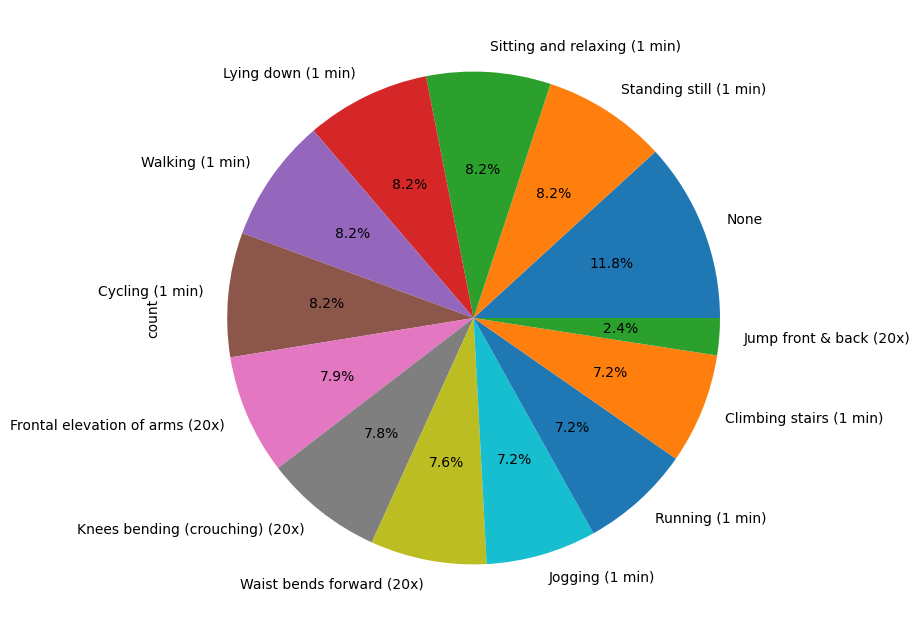

In [21]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [22]:
df1 = df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile(df[feature], 0.99)
    print(feature, "range:", lower_range, 'to', upper_range)
    
    df1 = df1.drop(df1[(df1[feature] >upper_range) | (df1[feature] < lower_range)].index, axis = 0)
    print('shape', df1.shape)

alx range: -10.72961 to 18.113739999999993
shape (332428, 14)
aly range: -19.369 to 1.932073999999999
shape (327296, 14)
alz range: -18.94687 to 13.209869999999997
shape (324135, 14)
glx range: -0.74397 to 0.81262
shape (317986, 14)
gly range: -1.0447659999999996 to 0.97749
shape (312122, 14)
glz range: -1.0982 to 0.83104
shape (306869, 14)
arx range: -21.486 to 8.583130999999993
shape (302443, 14)
ary range: -18.685 to 11.628
shape (297045, 14)
arz range: -10.78587 to 12.041
shape (294878, 14)
grx range: -1.0255 to 0.98627
shape (291680, 14)
gry range: -1.1417 to 0.93224
shape (286979, 14)
grz range: -0.7069 to 1.1293
shape (283128, 14)


In [23]:
df1

alx      aly       alz       glx      gly       glz     arx  \
325195  -0.21630  -9.8397  1.182900  0.558440 -0.75047  0.161100 -6.9359   
781070   0.23902 -11.7630  0.914230 -0.079777 -0.72795  0.567780 -1.4621   
250201   2.26540  -9.7278  0.484180 -0.465680 -0.86679 -0.153240 -6.1460   
891283   2.49260  -9.3757 -0.933440 -0.447120 -0.86116 -0.355600 -2.3438   
861909   1.43520  -9.7615  0.088778 -0.662340 -0.26642  0.660120 -2.9290   
...          ...      ...       ...       ...      ...       ...     ...   
1046268  1.85320 -10.3330 -3.581400  0.443410 -0.74296 -0.023576  3.3835   
1046269  1.72850 -10.5850 -4.064100  0.443410 -0.74296 -0.023576  3.6231   
1046270  0.12824 -10.5830 -2.861200  0.515770 -0.77486 -0.094303  3.2639   
1046271  1.14530  -9.3572 -5.029300  0.515770 -0.77486 -0.094303  2.6024   
1046272  1.57500  -9.8862 -5.447300  0.515770 -0.77486 -0.094303  3.0122   

            ary      arz      grx      gry      grz         Activity   subject  
325195  -6.4200  2.00190 -0.37451 -0.55441  0.89009             None  subject3  
781070  -8.6471  2.28640 -0.59608 -0.55236  0.78233             None  subject7  
250201  -9.0412  1.88130 -0.73137 -0.67967 -0.38147             None  subject2  
891283  -9.4007 -1.07420 -0.10784 -0.81725 -0.68319             None  subject8  
861909  -9.3791 -0.90645 -0.79216 -0.18070 -0.33405             None  subject8  
...         ...      ...      ...      ...      ...              ...       ...  
1046268 -5.9879  7.21100  0.87059 -0.40041  0.74784  Cycling (1 min)  subject9  
1046269 -9.5359  5.40860  0.87059 -0.40041  0.74784  Cycling (1 min)  subject9  
1046270 -7.5661  6.39250  0.87059 -0.40657  0.75216  Cycling (1 min)  subject9  
1046271 -6.5955  6.45150  0.87059 -0.40657  0.75216  Cycling (1 min)  subject9  
1046272 -6.9841  8.58830  0.87059 -0.40657  0.75216  Cycling (1 min)  subject9  

[283128 rows x 14 columns]

STEP4: DATA PROCESSING

In [24]:
le = LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])

In [25]:
df['Activity'] = le.fit_transform(df['Activity'])

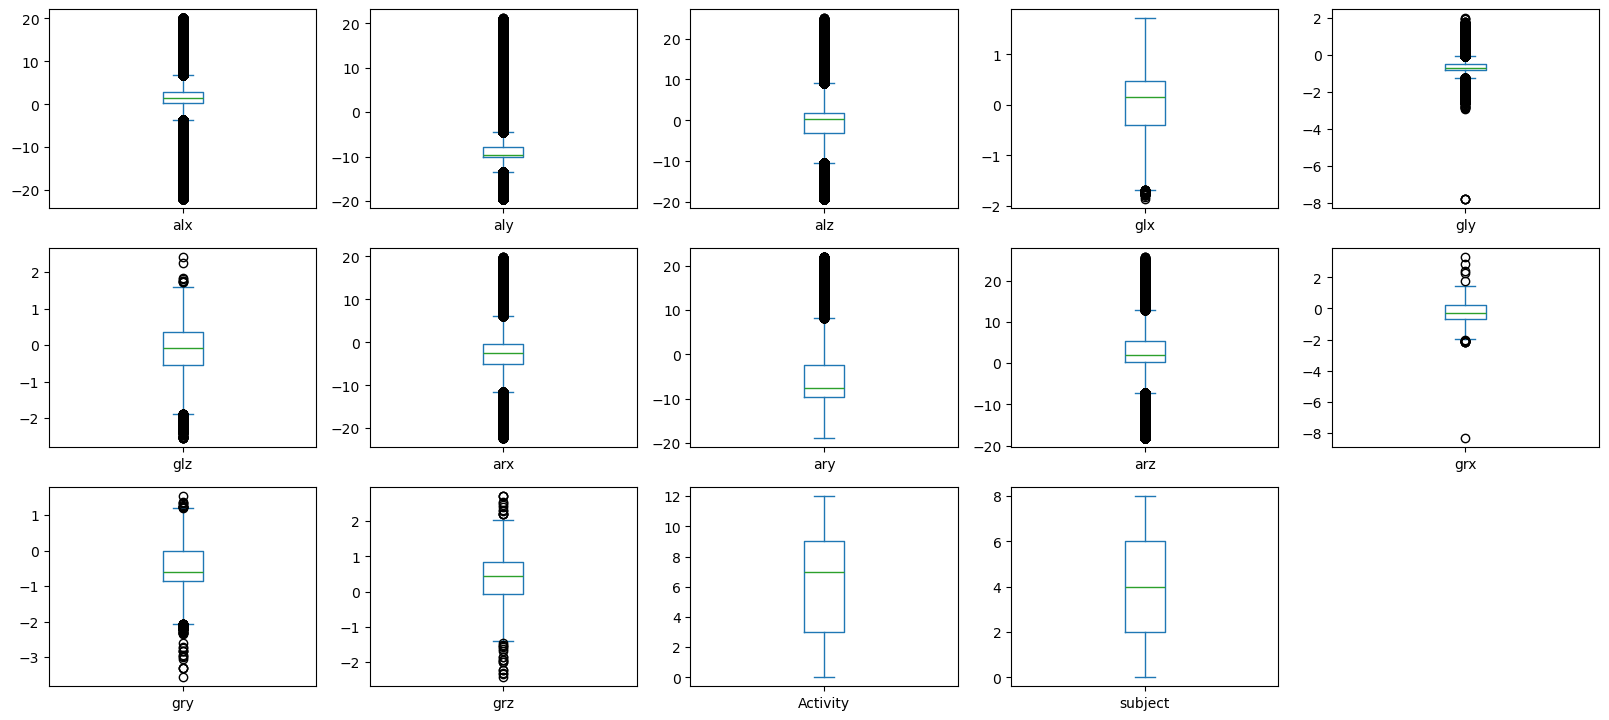

In [26]:
df.plot(kind= 'box', subplots=True, layout = (5,5), figsize=(20,15))
plt.show()

In [27]:
X = df.drop(["Activity", "subject"], axis = 1).values
y = df['Activity'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25)

In [29]:
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

STEP5: BUILDING MODEL

In [30]:
def resultsSummarizer(y_true, y_pred, cm_en = True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = sensitivity = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    if cm_en:
        plt.figure(figsize=(15,15))
        sns.heatmap(cm, annot = True, cmap = "Blues", xticklabels=activity_label.values(), yticklabels=activity_label.values())
        plt.title('confusion matrix')
        plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F1 score Score: ' + '{:.4%}'.format(f1))

1. LOGISTICREGRESSION()

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
lr.score(X_train, y_train)

0.5177968625161783

In [33]:
lr.score(X_test, y_test)

0.6

In [34]:
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
lr2.score(X_train_scaled, y_train)

0.5235399732892281

In [36]:
lr2.score(X_test_scaled, y_test)

0.68

In [37]:
y_pred_lr = lr2.predict(X_test_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


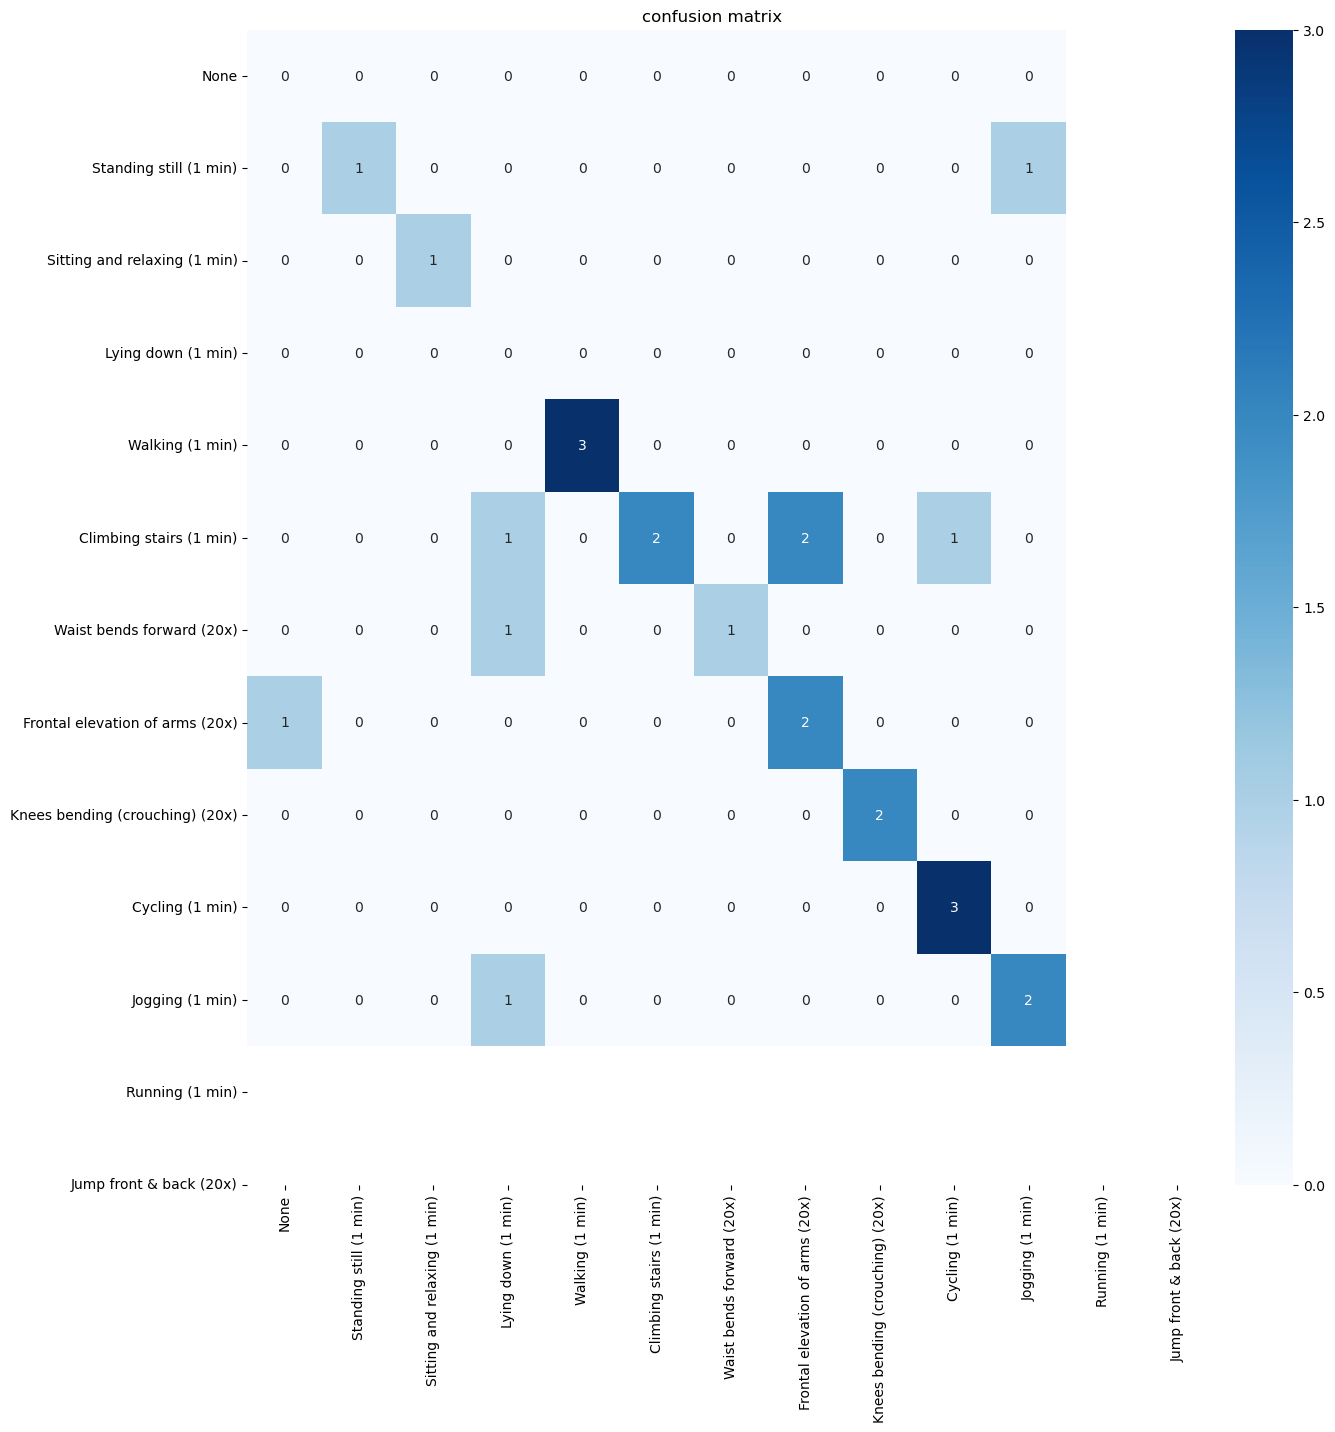

Accuracy Score: 68.0000%
Precision Score: 71.9697%
Recall Score: 60.6061%
F1 score Score: 62.9870%


In [38]:
resultsSummarizer(y_test, y_pred_lr)

2. KNN

In [39]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn = knn1.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


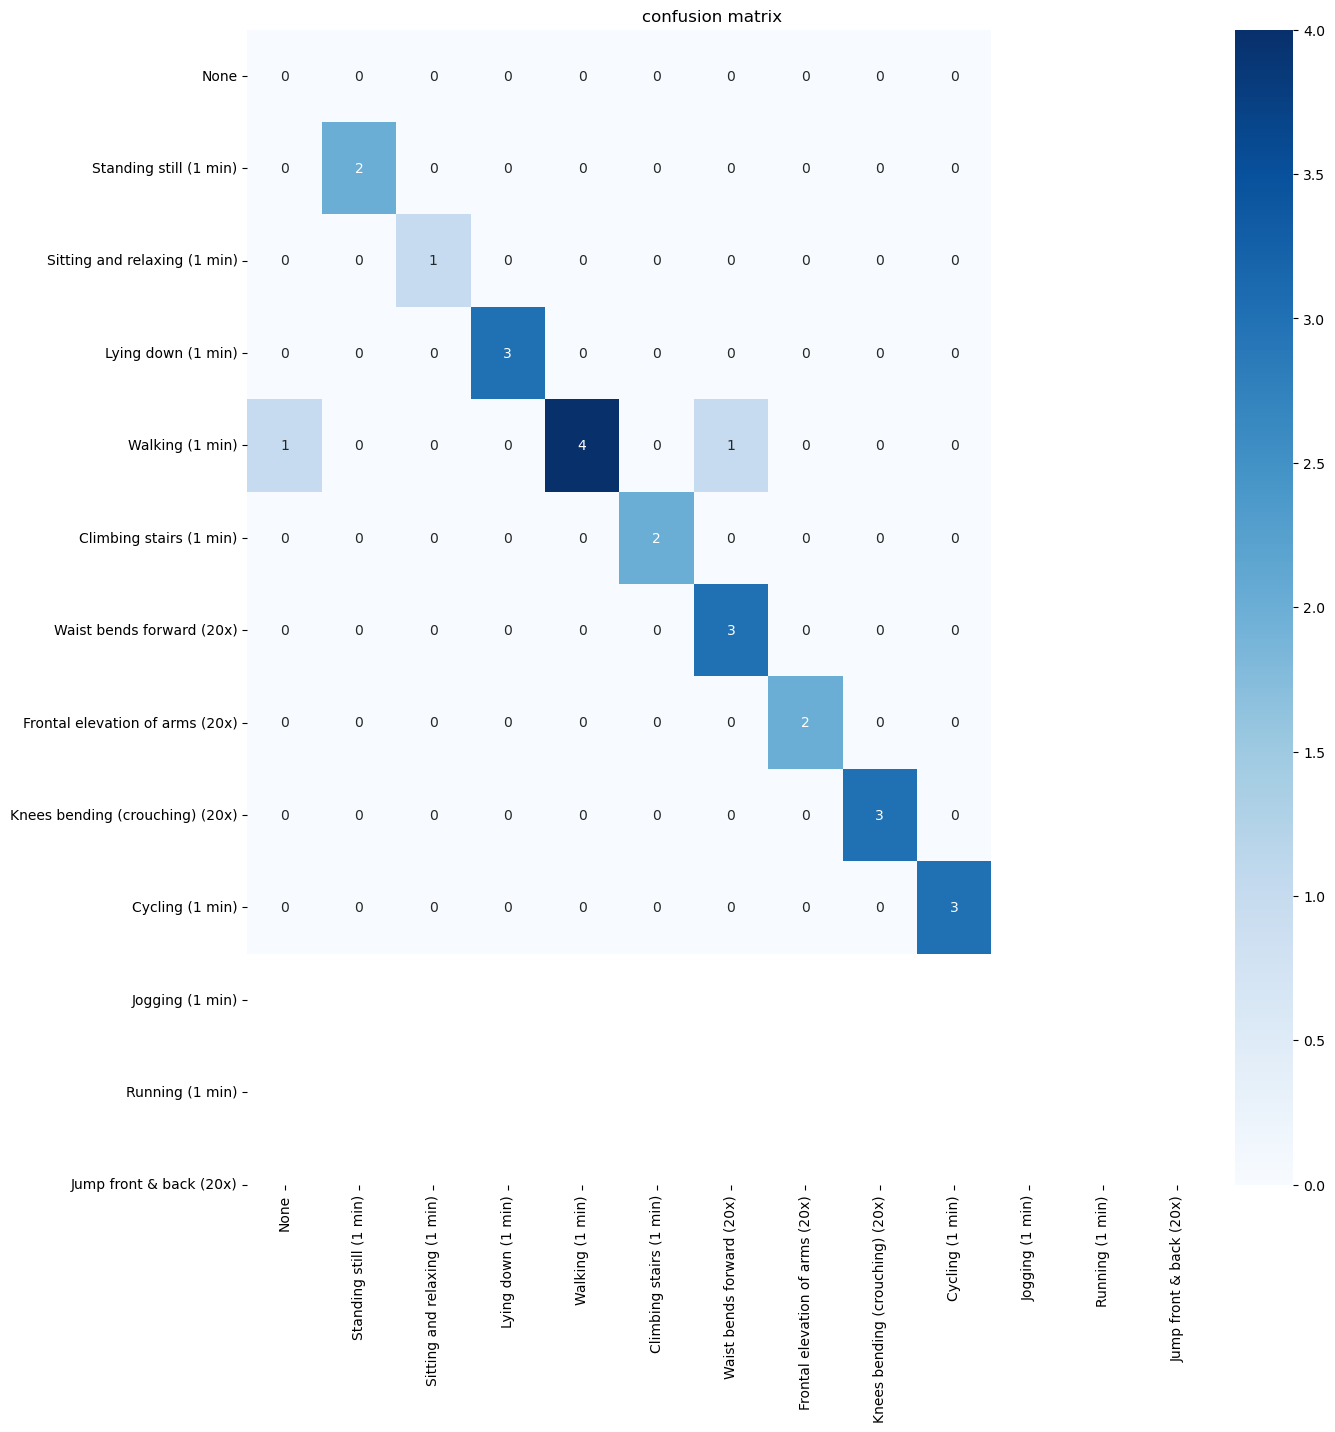

Accuracy Score: 92.0000%
Precision Score: 87.5000%
Recall Score: 86.6667%
F1 score Score: 86.5714%


In [41]:
resultsSummarizer(y_test, y_pred_knn)

In [42]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred_knn2 = knn2.predict(X_train_scaled)

In [43]:
resultsSummarizer(y_test, y_pred_knn, cm_en=False)

Accuracy Score: 92.0000%
Precision Score: 87.5000%
Recall Score: 86.6667%
F1 score Score: 86.5714%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test_scaled)
    print("\n===============No of neighbors: {n}===============\n")
    resultsSummarizer(y_test, y_pred, cm_en=False)


===============No of neighbors: {n}===============

Accuracy Score: 4.0000%
Precision Score: 1.6667%
Recall Score: 1.6667%
F1 score Score: 1.6667%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===============No of neighbors: {n}===============

Accuracy Score: 0.0000%
Precision Score: 0.0000%
Recall Score: 0.0000%
F1 score Score: 0.0000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'max_mdepth'